***##CROP PRICE PREDICTION***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#INTRODUCTION

Crop yield prediction plays a vital role in modern agriculture, especially with the increasing adoption of data-driven approaches.\ Comprehensive datasets, including information about soil composition, environmental factors, historical yield data, and crop management practices, are crucial for accurate yield predictions. Analyzing and understanding these datasets can provide valuable insights for optimizing agricultural practices and ensuring sustainable crop production.

##Loading the Dataset

In [5]:
df = pd.read_csv(r"c:/Users/h/Desktop/ALL/PROJECTS/Agro-tech/AgroTech-AI/yield-prediction/Crop_Yield_Prediction.csv")
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee,1500


I am creating a Machine Learning model that is capable of predicting the crop yield according to the specific climatic conditions and the soil nutrient levels.

*Features:

Nitrogen - ratio of Nitrogen content in soil\
Phosphorus - ratio of Phosphorus content in soil\
Potassium - ratio of Potassium content in soil\
Temperature - temperature in degree Celsius\
Humidity - relative humidity in %\
pH_Value - pH value of the soil\
Rainfall - rainfall in mm

In [6]:
df.shape

(2200, 9)

In [7]:
df.size

19800

##EDA(Explotary Data Analysis)

In [8]:
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop', 'Yield'],
      dtype='object')

In [9]:
#check any duplicate value in dataset
df.duplicated().sum()

np.int64(0)

In [10]:
#type of data type in column has content
df.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop            object
Yield            int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [12]:
#Summary statistics
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Yield
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [13]:
df.nunique()

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
Yield           502
dtype: int64

In [14]:
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [15]:
#Crop value counts
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
ChickPea       100
KidneyBeans    100
PigeonPeas     100
MothBeans      100
MungBean       100
Blackgram      100
Lentil         100
Pomegranate    100
Banana         100
Mango          100
Grapes         100
Watermelon     100
Muskmelon      100
Apple          100
Orange         100
Papaya         100
Coconut        100
Cotton         100
Jute           100
Coffee         100
Name: count, dtype: int64

#check if any null value and NA values

In [16]:
#check any null values
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
Yield          0
dtype: int64

In [17]:
# creates a summary table from a dataframe.
# it aggregates data based on 'Crop' and calculates summary statistics using mean for different features in the dataframe
crop_summary = pd.pivot_table(df, index=['Crop'], aggfunc='mean')
crop_summary

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
Crop,,,,,,,,
Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778


In [18]:
crop_summary_new = crop_summary.reset_index()
crop_summary_new

,Crop,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,Yield,pH_Value
0,Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,1704.25,5.929663
1,Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,2377.09,5.983893
2,Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,2131.43,7.133952
3,ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,2531.26,7.336957
4,Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,2550.84,5.976562
5,Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,2638.90,6.790308
6,Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,1411.05,6.912675
7,Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,2840.35,6.025937
8,Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,1789.90,6.732778
9,KidneyBeans,21.605357,20.75,67.54,20.05,105.919778,20.115085,3161.20,5.749411


##***Data Visualisation***

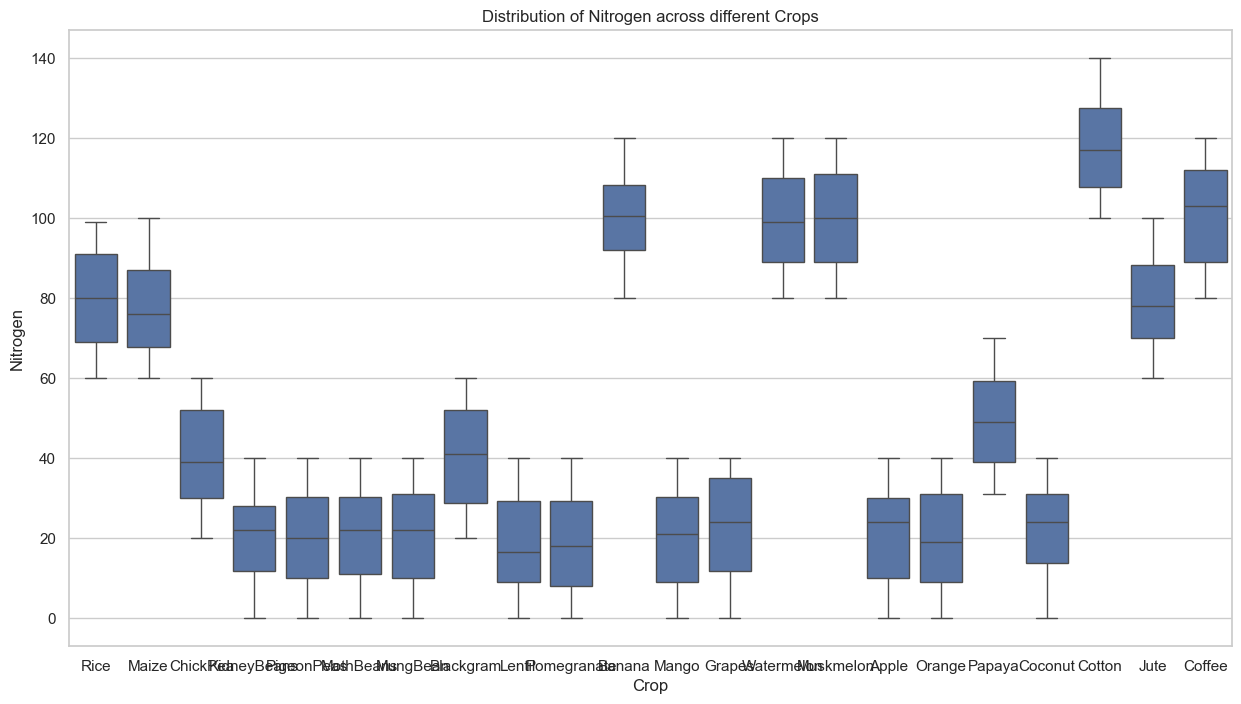

In [19]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot for Nitrogen distribution
plt.figure(figsize=(15,8))
sns.boxplot(x='Crop', y='Nitrogen', data=df)
plt.title('Distribution of Nitrogen across different Crops')
plt.show()

# Similarly, you can create boxplots for Phosphorus, Potassium, etc.

##***Comparison of Crop and Yields***

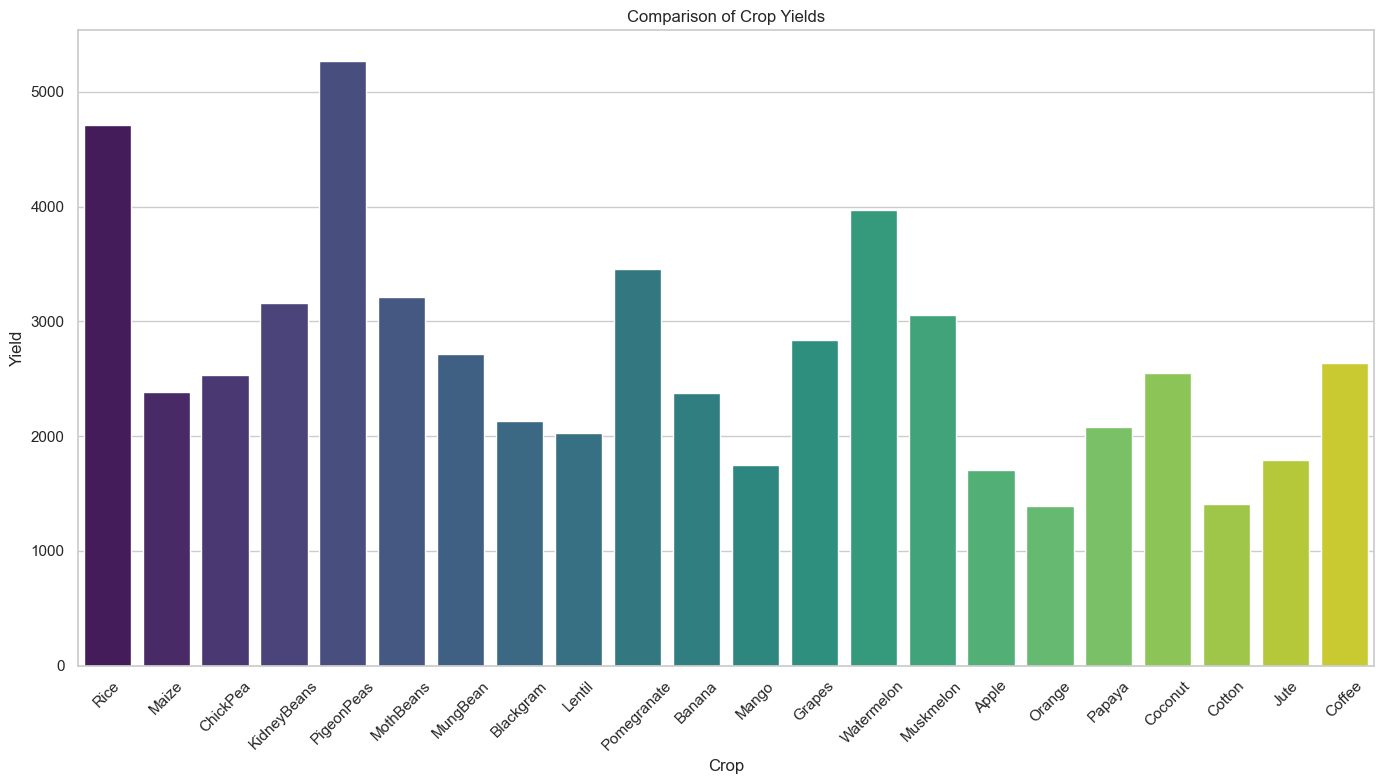

In [20]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Crop', y='Yield', ci=None, palette='viridis')
plt.title('Comparison of Crop Yields')
plt.xlabel('Crop')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Temperature and Humidity Visualization:

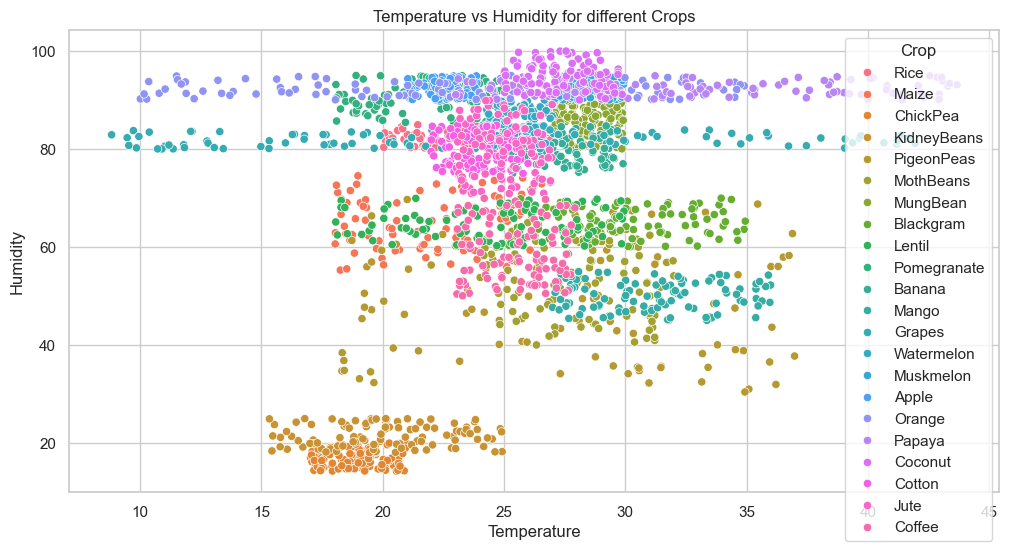

In [21]:
# Scatter plot for Temperature vs Humidity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Humidity', hue='Crop', data=df)
plt.title('Temperature vs Humidity for different Crops')
plt.show()

#Interactive Plots with Plotly:

In [22]:
# Install plotly package
%pip install plotly

import plotly.express as px

# Interactive scatter plot for Temperature vs Rainfall
fig = px.scatter(df, x='Temperature', y='Rainfall', color='Crop',
                 title='Temperature vs Rainfall for different Crops')
fig.show()


Note: you may need to restart the kernel to use updated packages.


##Pairplot for Detailed Analysis:

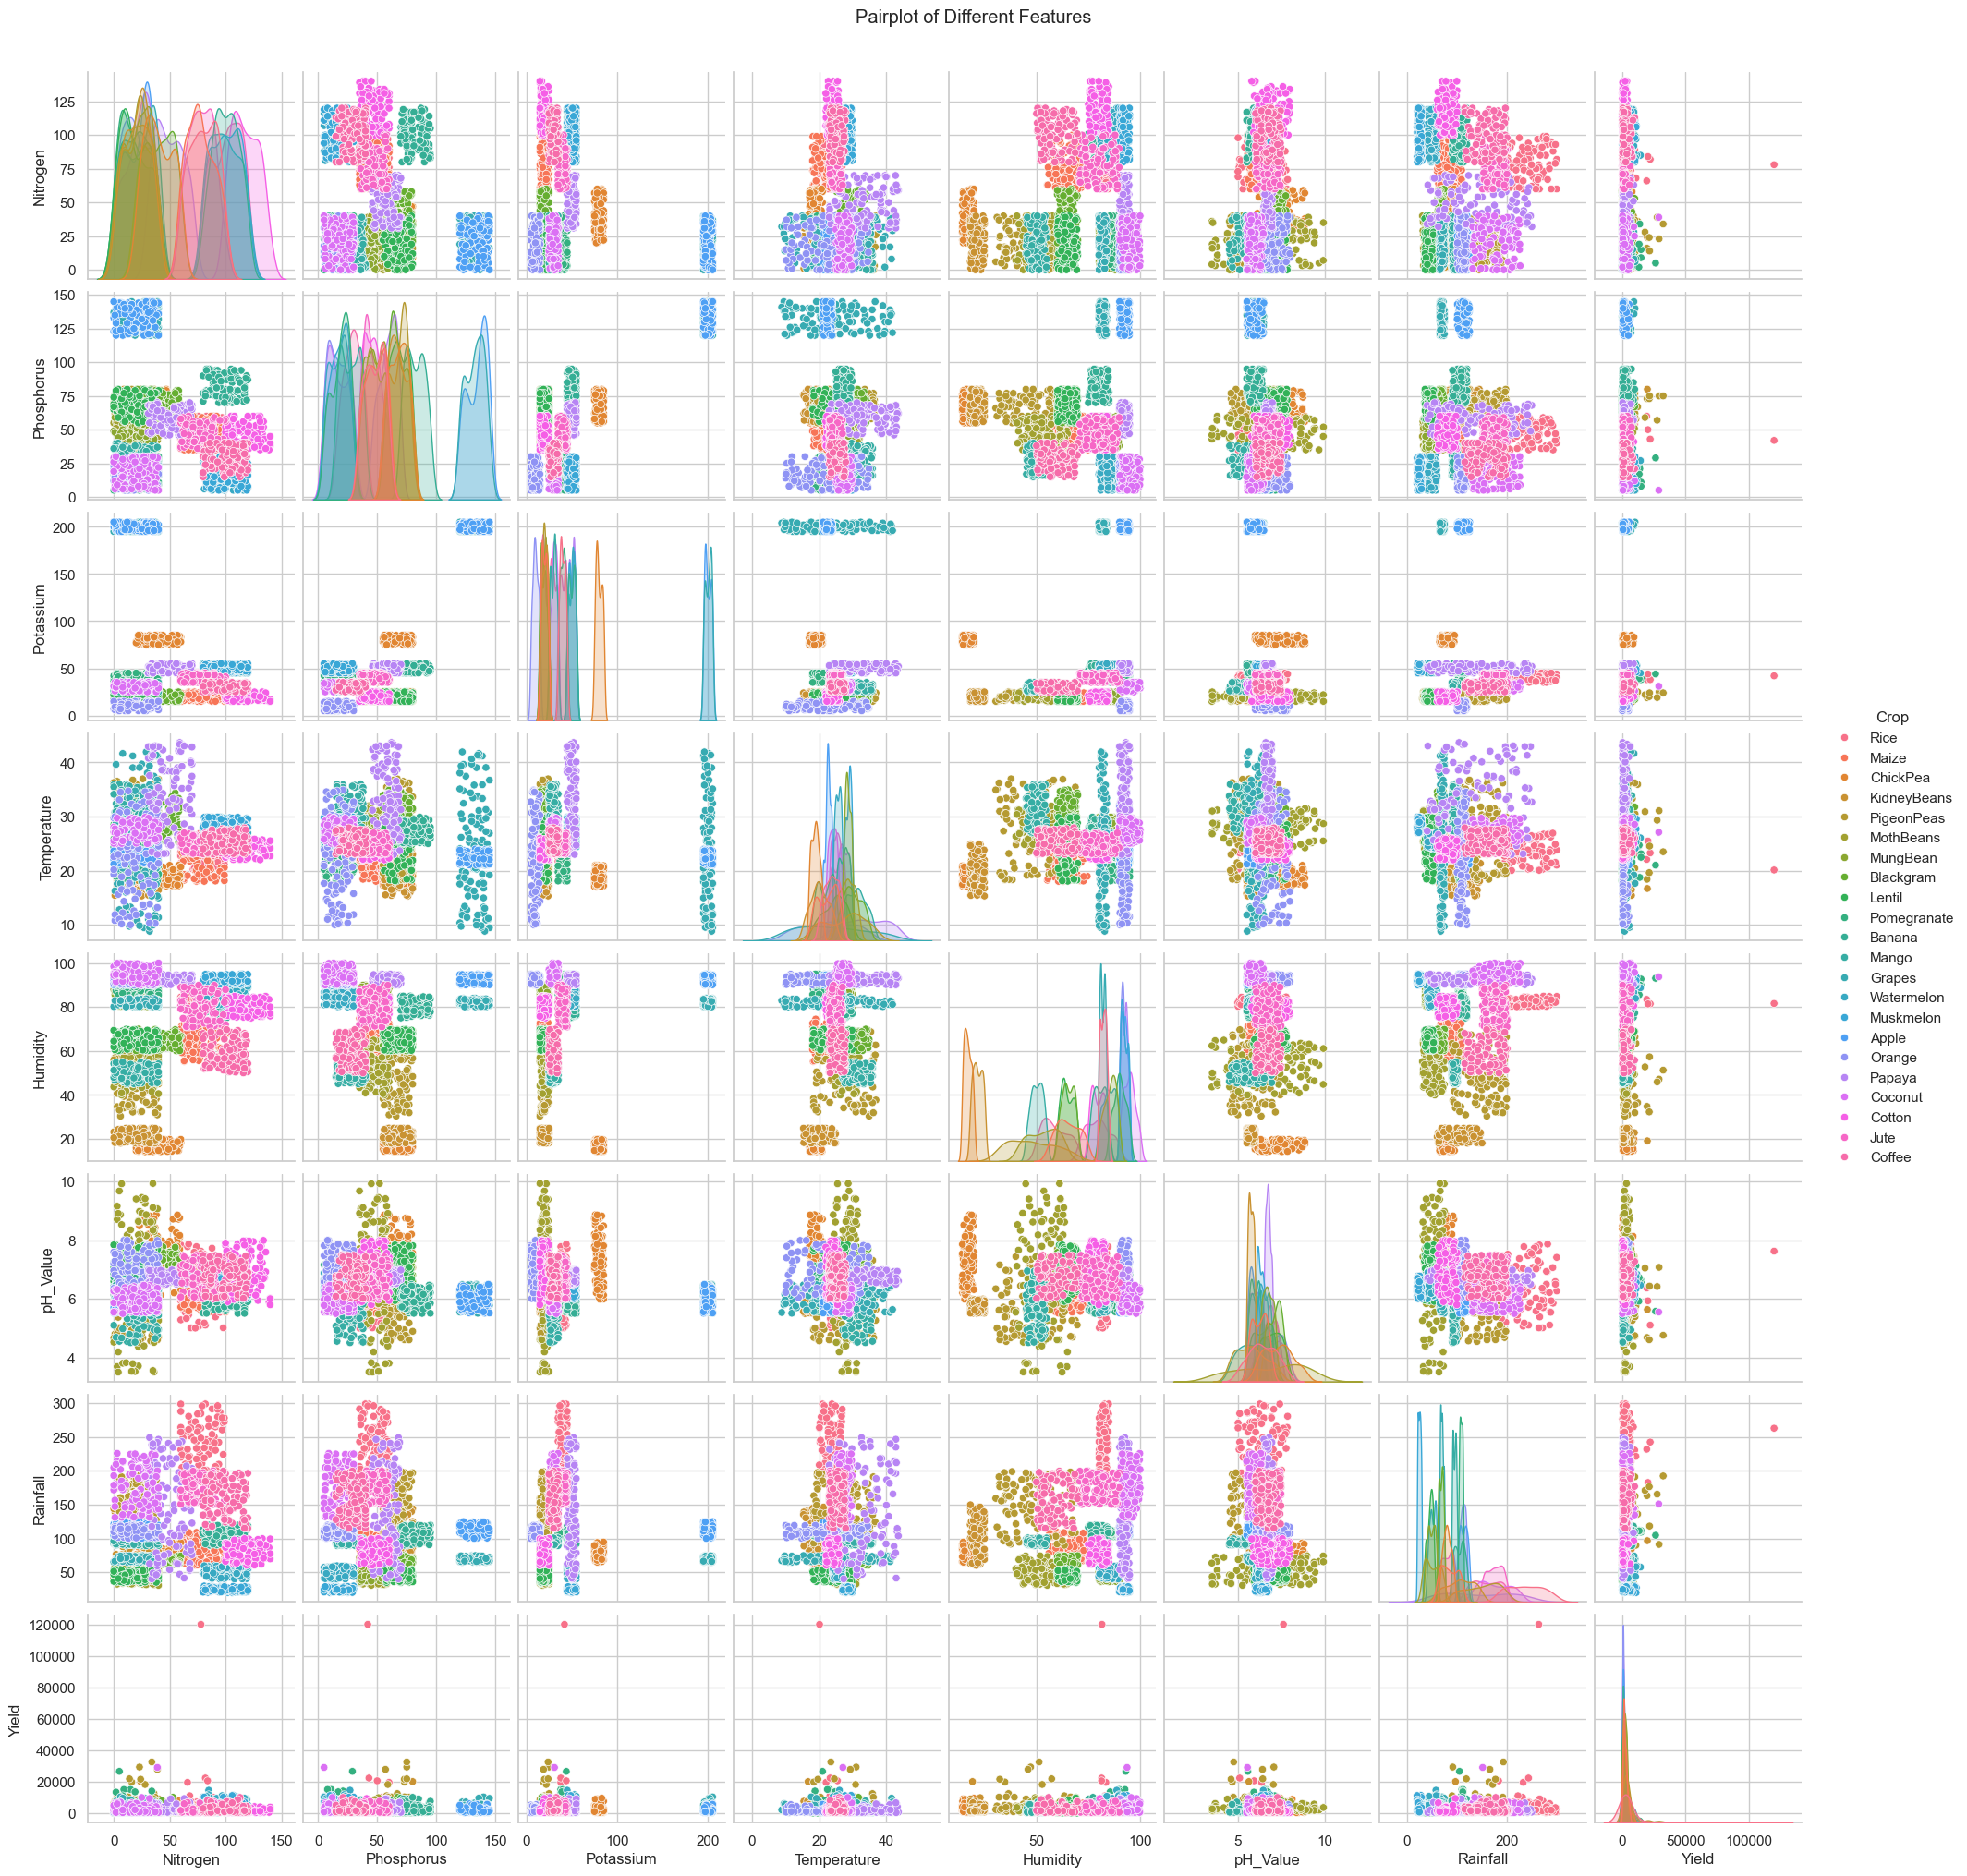

In [23]:
# Pairplot to see pairwise relationships
sns.pairplot(df, hue='Crop', diag_kind='kde')
plt.suptitle('Pairplot of Different Features', y=1.02)
plt.show()


##Distribution Plots on PH values for each crop:

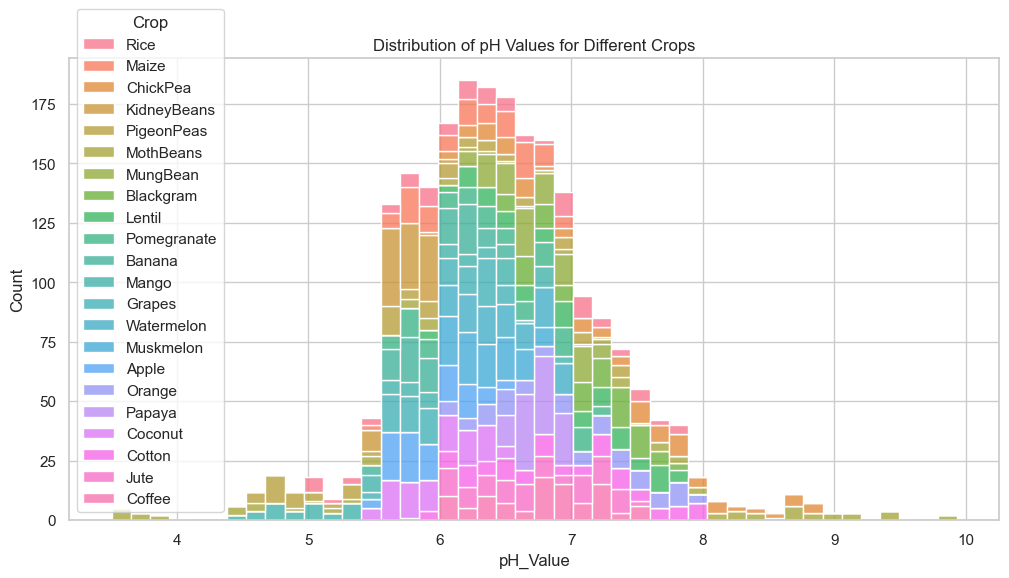

In [24]:
# Distribution of pH values for each crop
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='pH_Value', hue='Crop', multiple='stack')
plt.title('Distribution of pH Values for Different Crops')
plt.show()

In [25]:
# creates a new dataframe named df1 by selecting specific columns.
df1 = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']]

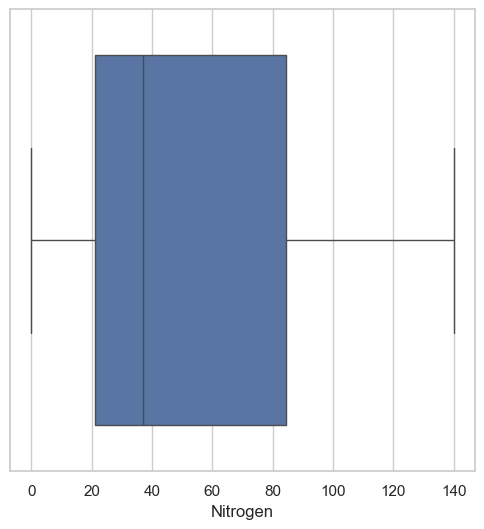

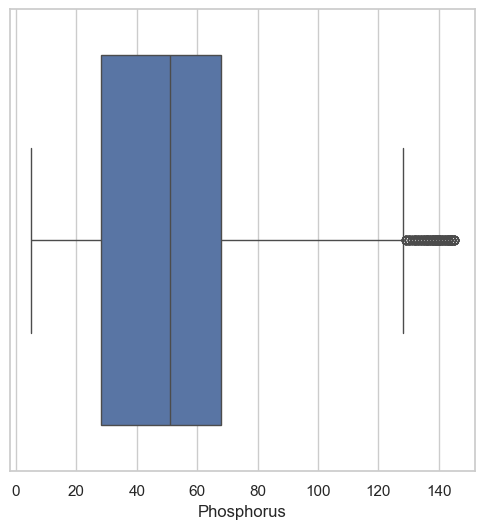

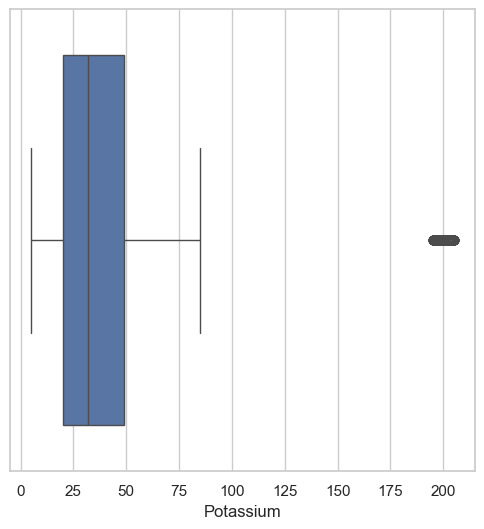

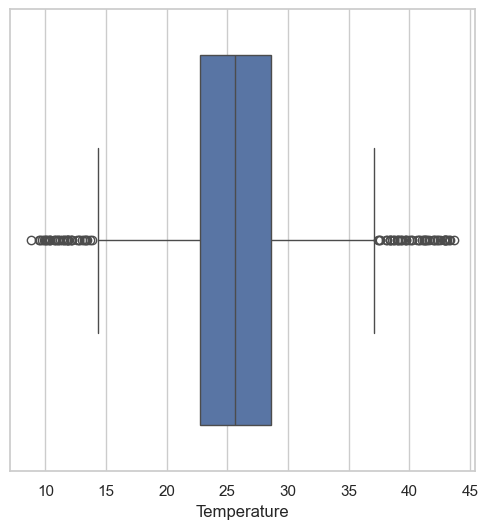

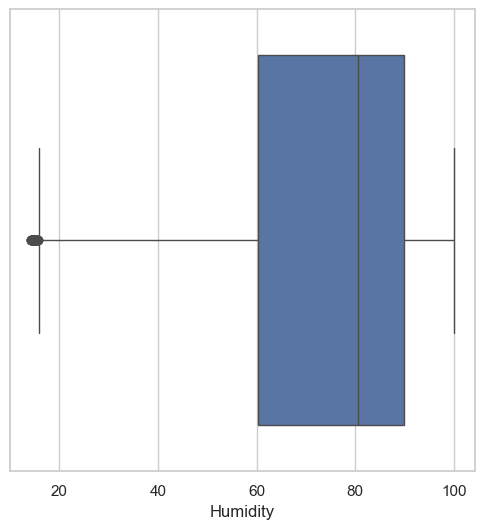

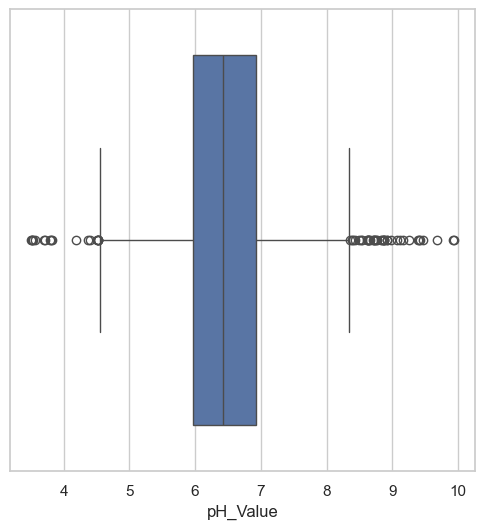

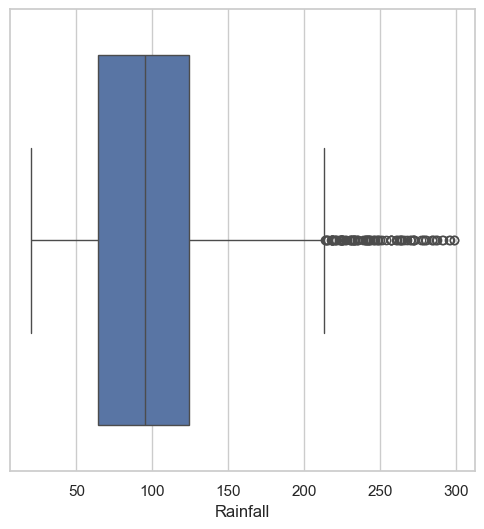

In [26]:
#outlier in dataset
for i in df1.columns:

    plt.figure(figsize = (6,6))
    sns.boxplot(x = df1[i])
    plt.show()

#use for loop iterate all crop compare accordingg to different form EFFECT on crop:-
1.PH\
2.RAINFALL\
3.NITROGEN\
4.all nutration as well

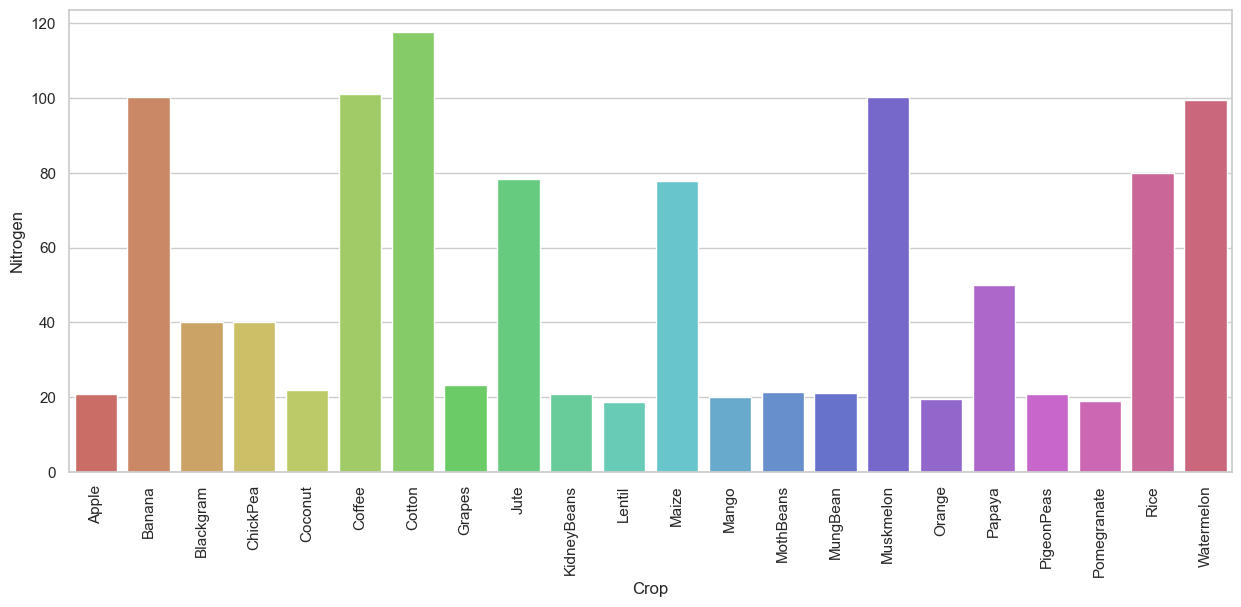

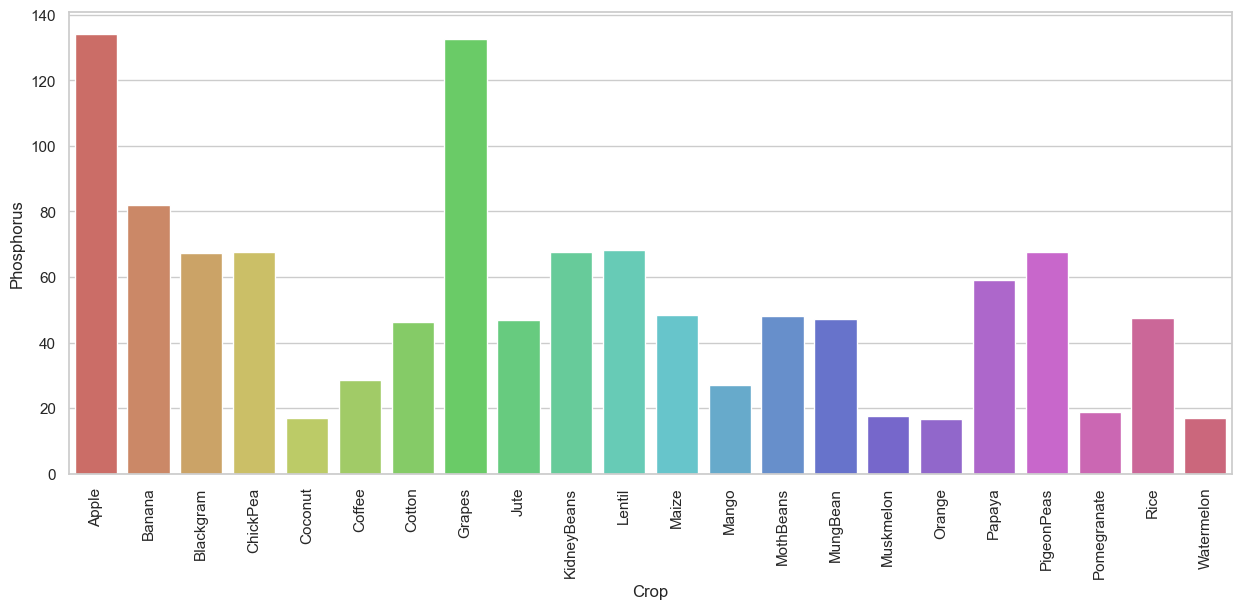

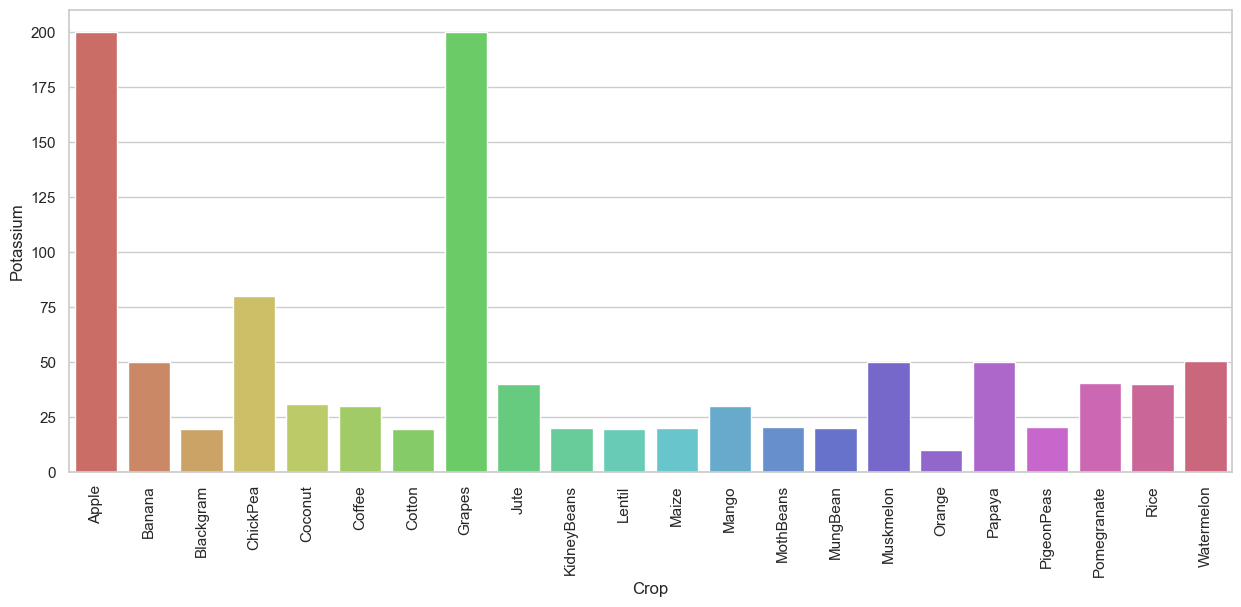

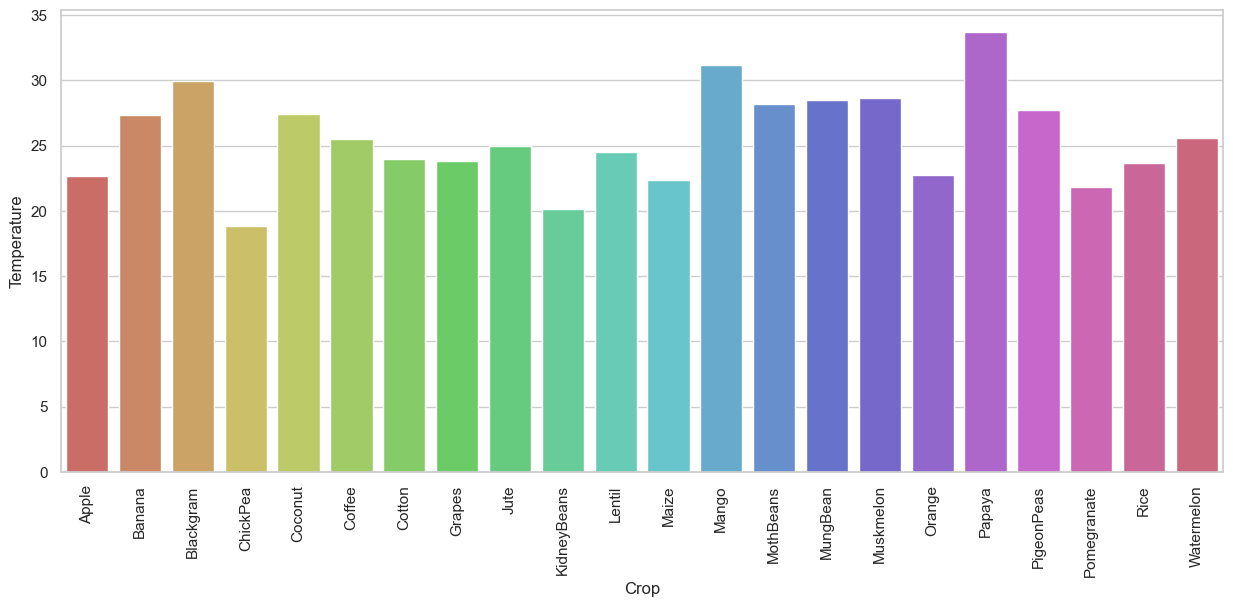

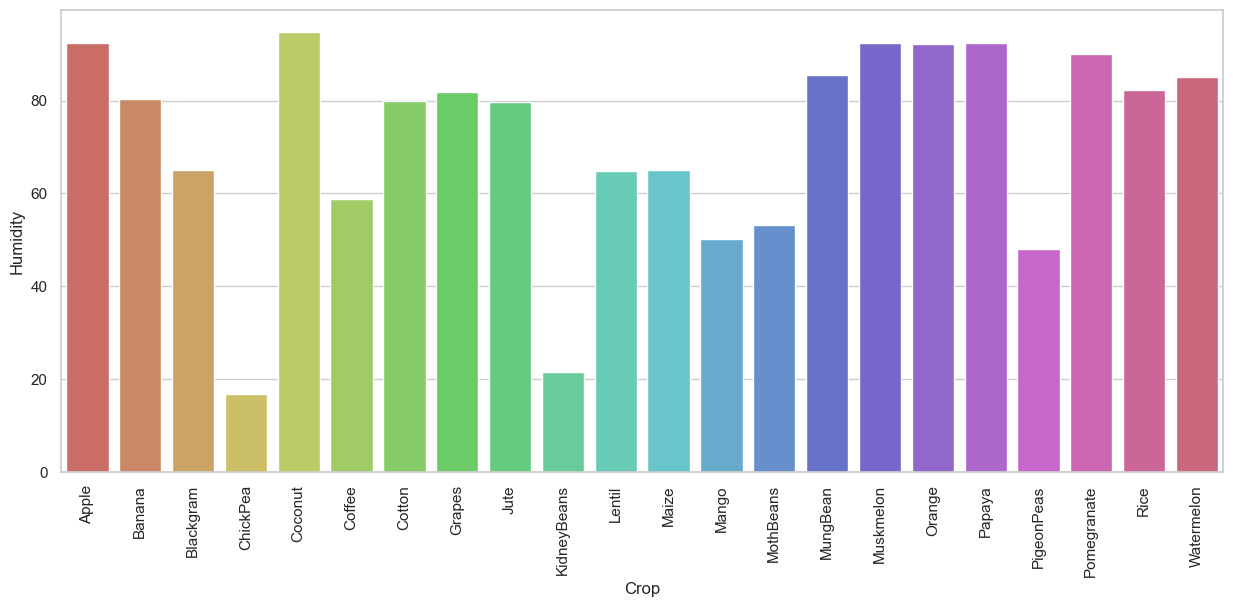

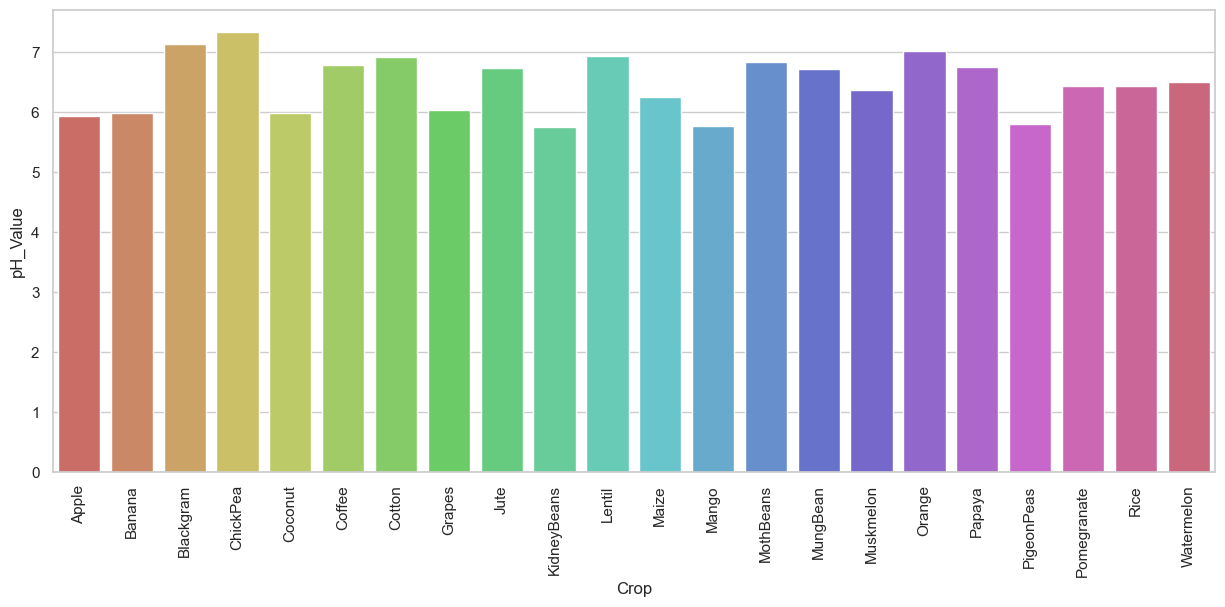

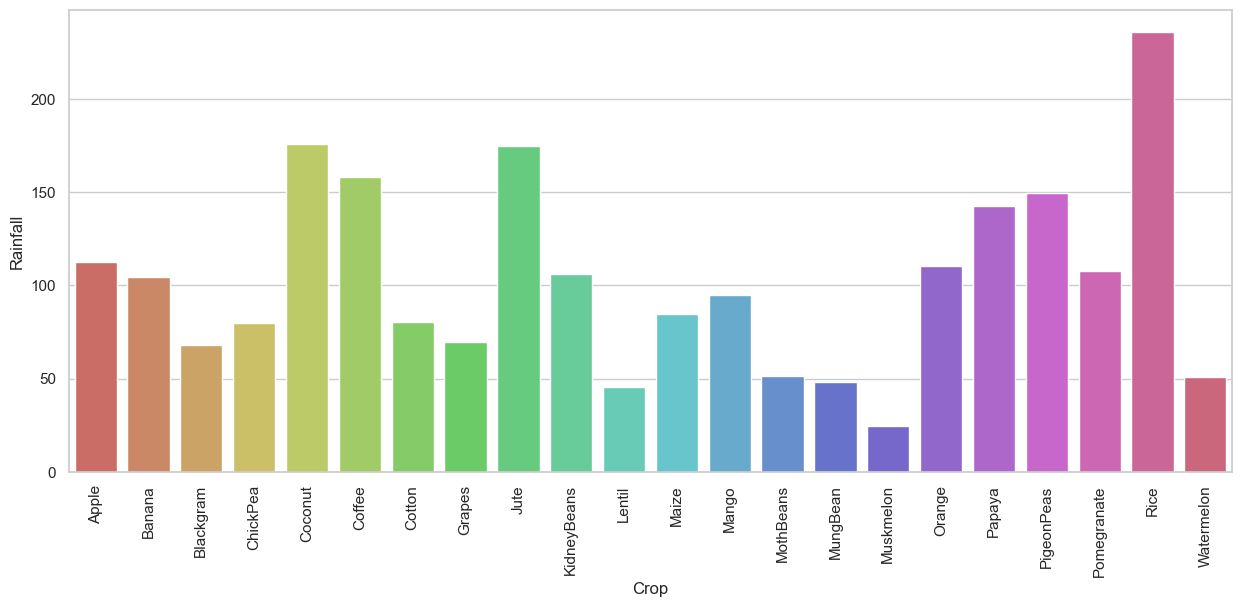

In [27]:
for i in df1.columns:
    plt.figure(figsize = (15, 6))
    sns.barplot(x = 'Crop', y = i, data = crop_summary_new, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

##CORRELATION (between different features)

Correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two variables.\
It ranges from -1 to 1, where:
1) 1 indicates a perfect positive linear relationship,\
2) -1 indicates a perfect negative linear relationship, and\
3) 0 indicates no linear relationship.

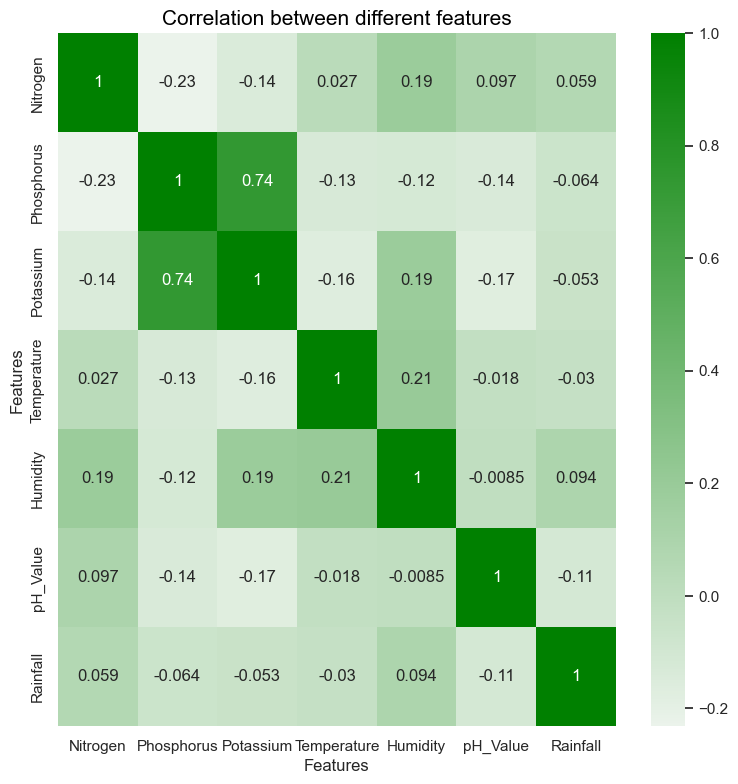

In [28]:
df1.corr()
fig, ax = plt.subplots(1, 1, figsize = (9,9))

green_cmap = sns.light_palette("green", as_cmap=True) #color in green graph corelaton

sns.heatmap(df1.corr(), annot = True, cmap =green_cmap)
ax.set(xlabel = 'Features')
ax.set(ylabel = 'Features')
plt.title('Correlation between different features', fontsize = 15, c = 'black')
plt.show()

##Data Pre-processing
-convert categorical data to numerical data.\
-This is a common preprocessing step in machine learning, especially when dealing with categorical data that needs to be converted into a format suitable for model training.

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# creates an instance of the LabelEncoder class, which will be used to transform the categorical values into numerical labels.

df['Crop'] = le.fit_transform(df['Crop'])

In [30]:
#check the data numerical form or not
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,120000


#SKEW

A skewness value of 0 indicates a symmetric distribution.\
Positive skewness (skew > 0) means the data is skewed to the right, with a tail extending towards higher values.\
Negative skewness (skew < 0) indicates a left-skewed distribution, with a tail extending towards lower values.

In [31]:
# calculates the skewness of each numerical column in the dataframe.
# Skewness measures the asymmetry of the data's distribution.
df.skew()

Nitrogen        0.509721
Phosphorus      1.010773
Potassium       2.375167
Temperature     0.184933
Humidity       -1.091708
pH_Value        0.283929
Rainfall        0.965756
Crop            0.000000
Yield          15.926745
dtype: float64

In [32]:
#for convert rigt skewness which has high skewness,treating by logarithim
df['Phosphorus'] = np.log(df['Phosphorus'])

df['Potassium'] = np.log(df['Potassium'])

# For RIGHT skewed.
# Logarithmic transformation.

df.skew()

Nitrogen        0.509721
Phosphorus     -0.782108
Potassium       0.804010
Temperature     0.184933
Humidity       -1.091708
pH_Value        0.283929
Rainfall        0.965756
Crop            0.000000
Yield          15.926745
dtype: float64

In [33]:
#for treatng left skewness multiple 2 in Humidity
df['Humidity'] = (df['Humidity'])** 2

# For LEFT skewed
# Exponential transformation.

df.skew()

Nitrogen        0.509721
Phosphorus     -0.782108
Potassium       0.804010
Temperature     0.184933
Humidity       -0.522852
pH_Value        0.283929
Rainfall        0.965756
Crop            0.000000
Yield          15.926745
dtype: float64

In [34]:
#treating the skewness of Yield
iq1 = df['Yield'].quantile(0.25)
# Calculates the first quartile (Q1) of the 'Yield' column, which represents the value below which 25% of the data falls.

iq2 = df['Yield'].quantile(0.75)
# Calculates the third quartile (Q3) of the 'Yield' column, which represents the value below which 75% of the data falls.

# second quartile (Q2) is equivalent to the median and is often calculated separately.

print(iq1)

print(iq2)

df['Yield'] = np.where(df['Yield']<iq1,iq1,df['Yield'])
# Replaces values in the 'Yield' column that are below Q1 with Q1.

df['Yield'] = np.where(df['Yield']>iq2,iq2,df['Yield'])
# Replaces values in the 'Yield' column that are above Q3 with Q3.

df.skew()

950.0
3500.0


Nitrogen       0.509721
Phosphorus    -0.782108
Potassium      0.804010
Temperature    0.184933
Humidity      -0.522852
pH_Value       0.283929
Rainfall       0.965756
Crop           0.000000
Yield          0.283069
dtype: float64

##***Splitting the Dataset into Train Dataset and Test Dataset***

In [35]:
X = df.drop(columns='Crop')
y = df['Crop']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Display the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1760, 8)
X_test shape: (440, 8)
y_train shape: (1760,)
y_test shape: (440,)


##***BUILDING MODELS***

#Linear Regression model:-

In [38]:
#Linear Regression
from sklearn.linear_model import LinearRegression

regressor_lr = LinearRegression()
# creates a Linear Regression model object named regressor_lr.
# This object can be trained on data and used to make predictions in regression tasks.

regressor_lr.fit(X_train, y_train)

LinearRegression()

In [39]:
# used to make predictions using a trained linear regressor on a test set (X_test)
y_pred_lr = regressor_lr.predict(X_test)

In [40]:
# Calculates the MSE of the predictions made by the linear regressor
# by taking the average squared difference between actual and predicted values.
mse_lr = mean_squared_error(y_pred_lr, y_test)
print("Mean Squared Error (MSE) for Linear Regression:", mse_lr)

Mean Squared Error (MSE) for Linear Regression: 32.9054941273741


#K-Nearest Neighbor Regressor model:-

In [41]:
#K-Nearest Neighbor Regressor
from sklearn.neighbors import KNeighborsRegressor

regressor_knn = KNeighborsRegressor()
# creates a K-Nearest Neighbor model object named regressor_knn.
# This object can be trained on data and used to make predictions in regression tasks.

regressor_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [42]:
y_pred_knn = regressor_knn.predict(X_test)
# used to make predictions using a trained k-nearest neighbor regressor on a test set (X_test)

In [43]:
mse_knn = mean_squared_error(y_pred_knn, y_test)
# Calculates the MSE of the predictions made by the k-nearest neighbor regressor
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for K-Nearest Neighbors Regression (KNN Regression):", mse_knn)

Mean Squared Error (MSE) for K-Nearest Neighbors Regression (KNN Regression): 28.569272727272725


#Decision Tree Regressor model:-

In [44]:
from sklearn.tree import DecisionTreeRegressor

regressor_dt = DecisionTreeRegressor()
# creates a Linear Regression model object named regressor_dt.
# This object can be trained on data and used to make predictions in regression tasks.

regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [45]:
y_pred_dt = regressor_dt.predict(X_test)
# used to make predictions using a trained decision tree regressor on a test set (X_test)

In [46]:
mse_dt = mean_squared_error(y_pred_dt, y_test)
# Calculates the MSE of the predictions made by the decision tree regressor
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for Decision Tree Regression:", mse_dt)


Mean Squared Error (MSE) for Decision Tree Regression: 2.85


#Random Forest Regressor model:-

In [47]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor()
# creates a Random Forest Regression model object named regressor_rf.
# This object can be trained on data and used to make predictions in regression tasks.

regressor_rf.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
y_pred_rf = regressor_rf.predict(X_test)
# used to make predictions using a trained random forest regressor on a test set (X_test)

In [49]:
mse_rf = mean_squared_error(y_pred_rf, y_test)
# Calculates the MSE of the predictions made by the random forest regressor
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for Random Forest Regression:", mse_rf)

Mean Squared Error (MSE) for Random Forest Regression: 2.5105104545454546


# Support Vector Regressor

In [50]:
from sklearn.svm import SVR

regressor_svr = SVR()
# creates a Support Vector Regression model object named regressor_svr.
# This object can be trained on data and used to make predictions in regression tasks.
regressor_svr.fit(X_train, y_train)

SVR()

In [51]:
y_pred_svr = regressor_svr.predict(X_test)
# used to make predictions using a trained support vector regressor on a test set (X_test)

In [52]:
mse_svr = mean_squared_error(y_pred_svr, y_test)
# Calculates the MSE of the predictions made by the support vector regressor
# by taking the average squared difference between actual and predicted values.

print("Mean Squared Error (MSE) for Support Vector Regression (SVR):", mse_svr)

Mean Squared Error (MSE) for Support Vector Regression (SVR): 44.0246461015903


##***Comparing all the Regressor models(using MSE)***
-check the efficiency Using MSE compare\
-lowest MSE model has highest accurate model to apply

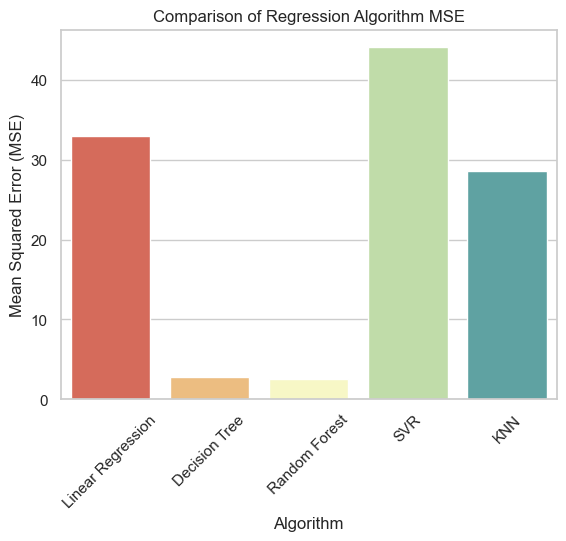

In [53]:
mse_scores = [mse_lr, mse_dt, mse_rf, mse_svr, mse_knn]
# creating a list of mse scores.

algorithm_labels = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN']
# creating generic model labels.

sns.barplot(x = algorithm_labels, y = mse_scores, palette = 'Spectral')
# Creating a bar plot using Seaborn with generic algorithm labels.

plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Algorithm MSE')
# Setting labels and title

plt.xticks(rotation = 45)
# adjusting the rotation angle of x-axis labels.
plt.show()

##***conclusion:-***
-According to mse Decision Tree is the best model to apply with highest accuracy rate\
-Accurate crop yield prediction is essential for modern agriculture's success, enabling farmers to make informed decisions, optimize resource use, mitigate risks, and enhance sustainability.\ Leveraging comprehensive datasets and advanced analytical tools empowers farmers and agricultural experts to improve production efficiency, resilience, and profitability, ultimately ensuring food security and environmental stewardship in the agricultural sector